<a href="https://colab.research.google.com/github/romeshb/Ecommerce_New_Seller_Problem/blob/main/New_ECommerce_Seller.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Problem Statement: Our Client wants to start selling products on Wish.com, An ECommerce Platform starting this Summer. As a Data Scientist I am required to help the client with key insights from the data.


- We have a client who is a new seller on ecommerce platform wish.com
- The client is wishing to begin his ecommerce business as a reseller on wish.com
- Our task is to give him the a few best colours, sizes, keywords, product tiles to use. Such a sales are maximum.
- Also we have to predict how many number of units will sale. So accordingly our reseller will keep the inventory ready.



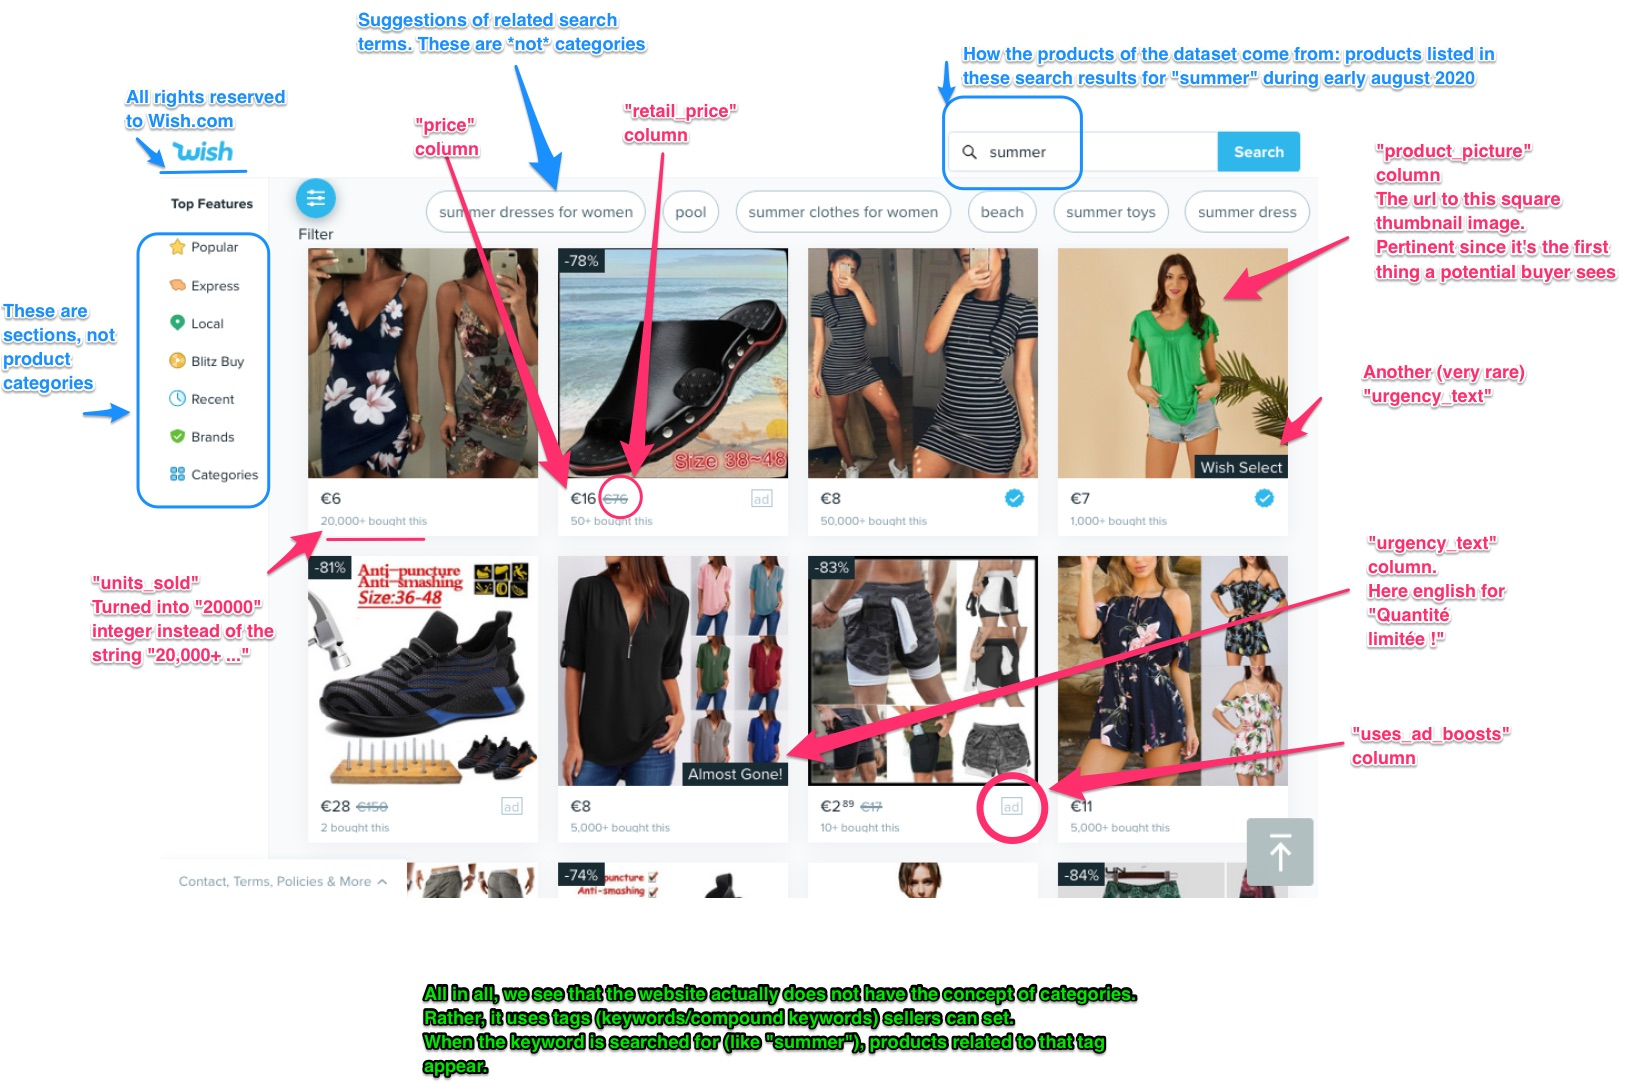

# 1 Loading, understanding our Data using Descriptive Statistics

In [ ]:
# Loading the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# load the data into a Pandas DataFrame
df = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/ECommerce_NewSeller_Client/summer-products-with-rating-and-performance_2020-08.csv")

In [ ]:
pd.set_option('display.max_columns', 500)

In [ ]:
# Peek at our data
df.head(2)

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,urgency_text,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.0,14,EUR,100,0,3.76,54,26.0,8.0,10.0,1.0,9.0,0,0,0,0,"Summer,Fashion,womenunderwearsuit,printedpajam...",white,M,50,Livraison standard,4,0,34,50,1.0,Quantité limitée !,CN,zgrdejia,zgrdejia,(568 notes),568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.0,22,EUR,20000,1,3.45,6135,2269.0,1027.0,1118.0,644.0,1077.0,0,0,0,0,"Mini,womens dresses,Summer,Patchwork,fashion d...",green,XS,50,Livraison standard,2,0,41,50,1.0,Quantité limitée !,CN,SaraHouse,sarahouse,"83 % avis positifs (17,752 notes)",17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08


In [ ]:
df.tail()

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,urgency_text,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
1568,Nouvelle Mode Femmes Bohême Pissenlit Imprimer...,New Fashion Women Bohemia Dandelion Print Tee ...,6.0,9,EUR,10000,1,4.08,1367,722.0,293.0,185.0,77.0,90.0,0,0,0,0,"bohemia,Plus Size,dandelionfloralprinted,short...",navyblue,S,50,Livraison standard,2,0,41,50,NaN,NaN,CN,cxuelin99126,cxuelin99126,"90 % avis positifs (5,316 notes)",5316,4.224605,5b507899ab577736508a0782,0,NaN,https://www.wish.com/c/5d5fadc99febd9356cbc52ee,https://contestimg.wish.com/api/webimage/5d5fa...,5d5fadc99febd9356cbc52ee,summer,2020-08
1569,10 couleurs femmes shorts d'été lacent ceintur...,10 Color Women Summer Shorts Lace Up Elastic W...,2.0,56,EUR,100,1,3.07,28,11.0,3.0,1.0,3.0,10.0,0,0,0,0,"Summer,Panties,Elastic,Lace,Casual pants,casua...",lightblue,S,2,Livraison standard,1,0,26,50,1.0,Quantité limitée !,CN,sell best quality goods,sellbestqualitygoods,"(4,435 notes)",4435,3.696054,54d83b6b6b8a771e478558de,0,NaN,https://www.wish.com/c/5eccd22b4497b86fd48f16b4,https://contestimg.wish.com/api/webimage/5eccd...,5eccd22b4497b86fd48f16b4,summer,2020-08
1570,Nouveautés Hommes Siwmwear Beach-Shorts Hommes...,New Men Siwmwear Beach-Shorts Men Summer Quick...,5.0,19,EUR,100,0,3.71,59,24.0,15.0,8.0,3.0,9.0,0,0,0,0,"runningshort,Beach Shorts,beachpant,menbeachsh...",white,SIZE S,15,Livraison standard,2,0,11,50,NaN,NaN,CN,shixueying,shixueying,86 % avis positifs (210 notes),210,3.961905,5b42da1bf64320209fc8da69,0,NaN,https://www.wish.com/c/5e74be96034d613d42b52dfe,https://contestimg.wish.com/api/webimage/5e74b...,5e74be96034d613d42b52dfe,summer,2020-08
1571,Mode femmes d'été sans manches robes col en V ...,Fashion Women Summer Sleeveless Dresses V Neck...,13.0,11,EUR,100,0,2.50,2,0.0,1.0,0.0,0.0,1.0,0,0,0,0,"Summer,fashion women,Fashion,Lace,Dresses,Dres...",white,Size S.,36,Livraison standard,3,0,29,50,NaN,NaN,CN,modai,modai,77 % avis positifs (31 notes),31,3.774194,5d56b32c40defd78043d5af9,0,NaN,https://www.wish.com/c/5eda07ab0e295c2097c36590,https://contestimg.wish.com/api/webimage/5eda0...,5eda07ab0e295c2097c36590,summer,2020-08
1572,Pantalon de yoga pour femmes à la mode Slim Fi...,Fashion Women Yoga Pants Slim Fit Fitness Runn...,7.0,6,EUR,100,1,4.07,14,8.0,3.0,1.0,0.0,2.0,0,0,0,0,"Summer,Leggings,slim,Yoga,pants,Slim Fit,Women...",red,S,50,Livraison standard,2,0,41,50,NaN,NaN,CN,AISHOPPINGMALL,aishoppingmall,"90 % avis positifs (7,023 notes)",7023,4.235939,5a409cf87b584e7951b2e25f,0,NaN,https://www.wish.com/c/5e857321f53c3d2d8f25e7ed,https://contestimg.wish.com/api/webimage/5e857...,5e857321f53c3d2d8f25e7ed,summer,2020-08


In [ ]:
# Dimension of Data
df.shape # Rows are 1573 and columns are 43.
print(f'This dataset has {df.shape[0]} Rows and {df.shape[1]} columns.')

This dataset has 1573 Rows and 43 columns.


In [ ]:
# cheking the data type of each Attribute
df.info()
#df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1573 non-null   object 
 1   title_orig                    1573 non-null   object 
 2   price                         1573 non-null   float64
 3   retail_price                  1573 non-null   int64  
 4   currency_buyer                1573 non-null   object 
 5   units_sold                    1573 non-null   int64  
 6   uses_ad_boosts                1573 non-null   int64  
 7   rating                        1573 non-null   float64
 8   rating_count                  1573 non-null   int64  
 9   rating_five_count             1528 non-null   float64
 10  rating_four_count             1528 non-null   float64
 11  rating_three_count            1528 non-null   float64
 12  rating_two_count              1528 non-null   float64
 13  rat

### Checking the Descriptive Statistics

In [ ]:
# Statistical Summary
df.describe()

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,merchant_rating_count,merchant_rating,merchant_has_profile_picture
count,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1528.000000,1528.000000,1528.000000,1528.000000,1528.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,473.0,1.573000e+03,1573.000000,1573.000000
mean,8.325372,23.288620,4339.005086,0.432931,3.820896,889.659250,442.263743,179.599476,134.549738,63.711387,95.735602,0.105531,0.018436,0.074380,0.012715,33.081373,2.345200,0.002543,40.456453,49.821360,1.0,2.649583e+04,4.032345,0.143675
std,3.932030,30.357863,9356.539302,0.495639,0.515374,1983.928834,980.203270,400.516231,311.690656,151.343933,214.075544,0.340709,0.134565,0.262472,0.112075,21.353137,1.024371,0.050379,20.301203,2.562799,0.0,7.847446e+04,0.204768,0.350871
min,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,6.000000,1.000000,1.0,0.000000e+00,2.333333,0.000000
25%,5.810000,7.000000,100.000000,0.000000,3.550000,24.000000,12.000000,5.000000,4.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2.000000,0.000000,31.000000,50.000000,1.0,1.987000e+03,3.917353,0.000000
50%,8.000000,10.000000,1000.000000,0.000000,3.850000,150.000000,79.000000,31.500000,24.000000,11.000000,20.000000,0.000000,0.000000,0.000000,0.000000,50.000000,2.000000,0.000000,40.000000,50.000000,1.0,7.936000e+03,4.040650,0.000000
75%,11.000000,26.000000,5000.000000,1.000000,4.110000,855.000000,413.500000,168.250000,129.250000,62.000000,94.000000,0.000000,0.000000,0.000000,0.000000,50.000000,3.000000,0.000000,43.000000,50.000000,1.0,2.456400e+04,4.161797,0.000000
max,49.000000,252.000000,100000.000000,1.000000,5.000000,20744.000000,11548.000000,4152.000000,3658.000000,2003.000000,2789.000000,3.000000,1.000000,1.000000,1.000000,50.000000,12.000000,1.000000,140.000000,50.000000,1.0,2.174765e+06,5.000000,1.000000


Observation:
- items are max priced at 49 Euros, with average price being 8 Euros.
- max units of a product sold are 100,000.

In [ ]:
# Checking the values in our responce variable
df.units_sold.value_counts(ascending = False)

100       509
1000      405
5000      217
10000     177
20000     103
50         76
10         49
50000      17
100000      6
8           4
1           3
7           2
2           2
3           2
6           1
Name: units_sold, dtype: int64

In [ ]:
for col in df.columns:
    if df[col].dtype =='O':
        #checking the value counts for each category with object type data
        print(f"Catgorical column: {col}")
        print("Checking the class distribution")
        print(df[col].value_counts())
        print("Checking the Descriptive statistics")
        print(df[col].describe())
        print("***"*10,'\n')
    else:
        #checking the value counts for each category with numeric type data
        print(f"Catgorical column: {col}")
        print("Checking the class distribution")
        print(df[col].value_counts())
        print("Checking the Descriptive statistics")
        print(df[col].describe())
        print("***"*10,'\n')

Catgorical column: title
Checking the class distribution
Nouvelle mode d'été femmes robe décontractée col rond lâche Big Swing jupe sans manches Soild couleur robe de plage                                                                      24
Mini robe de soirée décontractée sans manches pour femmes                                                                                                                                12
Femmes d'été Sling Dress V-cou Floral Strap plissé Casual Pocket Large Dress                                                                                                              9
Tissu taille formateur gilet chaud shaper été shaperwear minceur réglable sueur ceinture corps shaper                                                                                     9
Pantalon à lacets à la mode pour femmes d'été, plus la taille Pantalon court à taille haute décontracté                                                                                   9
   

In [ ]:
df_og = df.copy()

In [ ]:
#df = df_og.copy()

In [ ]:
df.shape

(1573, 43)

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
# plt.figure(figsize=(20,100), facecolor='white')
# plotnumber =1
# for col in df.columns:
#     ax = plt.subplot(12,4,plotnumber, autoscale_on= True)
#     plt.title(col)
#     if df[col].dtype =='O':
#         sns.countplot(x=col,data=df, hue = 'units_sold')
#         plt.xticks(rotation=45)
#         #plt.xlabel(col)
#         plotnumber+=1
        
#         #checking the value counts for each category
#         # print(f"Catgorical column: {col}")
#         # print("Checking the class distribution")
#         # print(df[col].value_counts())
#         # print("Checking the Descriptive statistics")
#         # print(df[col].describe())
#         # print("***"*10,'\n')
#     else:
#         sns.scatterplot(x=col,data=df, hue = 'units_sold')
#         plt.xticks(rotation=45)
#         plt.xlabel(col)
#         plotnumber+=1

# plt.show()

## Want to answer these following questions using Exploratory Data Analysis

- Clothes for which gender are listed the most?
- What is the sales distribution of products according to sizes?
- Which colour of clothes sales the most?
- Which tags are used by merchants the most?
- What are the tags, keywords used most frequently.
- Does using paid ad, boost product sales vs ratings

- Clothes for which gender are listed the most?

In [ ]:
#extracting gender information through product title
df['title_orig'].apply(lambda x: str(x).title())

def get_gender(text):
    if 'Man' in text or 'Men' in text and 'Woman' not in text:
        return 'Man'
    else:
        return 'Woman'

In [ ]:
df['product_for_gender'] = df['title_orig'].apply(get_gender)
df['product_for_gender'].value_counts()

Woman    1496
Man        77
Name: product_for_gender, dtype: int64

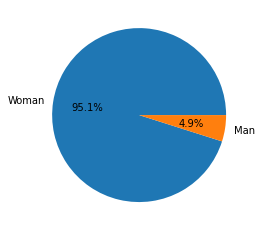

In [ ]:
label = df['product_for_gender'].value_counts().index.tolist()
plt.pie(df['product_for_gender'].value_counts(),labels  = label, autopct = '%1.1f%%');

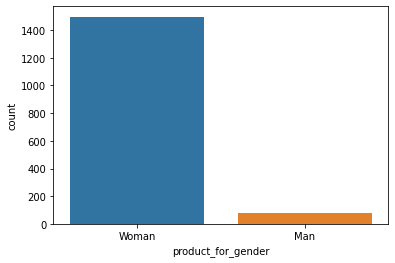

In [ ]:
sns.countplot(x =df['product_for_gender'])

- What is the sales distribution of products according to sizes?

In [ ]:
df['product_variation_size_id'].value_counts()

S                      641
XS                     356
M                      200
XXS                    100
L                       49
                      ... 
6XL                      1
AU plug Low quality      1
XXXL                     1
25-S                     1
SIZE S                   1
Name: product_variation_size_id, Length: 106, dtype: int64

In [ ]:
df['product_variation_size_id'] = df['product_variation_size_id'].apply(lambda x: str(x).upper())

In [ ]:
df['product_variation_size_id'].unique()

array(['M', 'XS', 'S', 'SIZE-XS', 'M.', 'XXS', 'L', 'XXL', 'NAN', 'S.',
       'CHOOSE A SIZE', 'XS.', '32/L', 'SUIT-S', 'XXXXXL', 'EU 35', '4',
       'SIZE S.', '1M BY 3M', '3XL', 'SIZE S', 'XL', 'WOMEN SIZE 36',
       'US 6.5 (EU 37)', 'XXXS', 'SIZE XS', '26(WAIST 72CM 28INCH)',
       'SIZE XXS', '29', '1PC', '100 CM', 'ONE SIZE', 'SIZE-4XL', '1',
       'S/M(CHILD)', '2PCS', 'XXXL', 'S..', '30 CM', '5XL', '33',
       'SIZE M', '100 X 100CM(39.3 X 39.3INCH)', '100PCS', '2XL', '4XL',
       'SIZEL', 'XXXXL', 'BASE & TOP & MATTE TOP COAT', '35', '34',
       'SIZE-XXS', 'S(BUST 88CM)', 'S (WAIST58-62CM)', 'S(PINK & BLACK)',
       '20PCS', 'US-S', 'SIZE -XXS', 'X   L', 'WHITE', '25', 'SIZE-S',
       'ROUND', 'PACK OF 1', '1 PC.', 'S DIAMETER 30CM', '6XL',
       'AU PLUG LOW QUALITY', '5PAIRS', '25-S', 'SIZE/S', 'S PINK',
       'SIZE-5XL', 'DAUGHTER 24M', '2', 'BABY FLOAT BOAT', '10 ML', '60',
       'SIZE-L', 'US5.5-EU35', '10PCS', '17', 'WOMEN SIZE 37',
       '3 LAYERED ANKLET

In [ ]:
size_list = list(df['product_variation_size_id'])

In [ ]:
xxs_err = []
xs_err = []
s_err = []
m_err = []
l_err = []
xl_err = []
xxl_err = []

for i in size_list:
    if (i == 'XXS') or (i == 'XXXS') or (i == 'SIZE XXS') or (i == 'SIZE-XXS') or (i == 'SIZE -XXS'):
        xxs_err.append(i)
    elif (i == 'XS') or (i == 'XS.') or (i == 'SIZE XS') or (i == 'SIZE-XS'):
        xs_err.append(i)
    elif (i == 'S') or (i == 'S.') or (i == 'SUIT-S') or (i == 'SIZE S.') or (i == 'SIZE S') or (i == 'S..') \
    or (i == 'S(BUST 88CM)') or (i == 'S (WAIST58-62CM)') or (i == 'SIZE-S') or (i == 'S DIAMETER 30CM') or (i == '25-S') \
    or (i == 'SIZE/S') or (i == 'PANTS-S') or (i == 'SIZE--S'):
        s_err.append(i)
    elif (i == 'M') or (i == 'M.') or (i == 'SIZE M'):
        m_err.append(i)
    elif (i == 'L') or (i == '32/L') or (i == 'L.') or (i == 'SIZEL'):
        l_err.append(i)
    elif (i == 'XL') or (i == 'X   L'):
        xl_err.append(i)
    elif (i == 'XXL') or (i == 'XXXXXL') or (i == '3XL') or (i == 'SIZE-4XL') or (i == 'XXXL') or (i == '5XL') \
    or (i == '2XL') or (i == '4XL') or (i == 'XXXXL') or (i == '6XL') or (i == 'SIZE-5XL') or (i == 'SIZE4XL') \
    or (i == '04-3XL') or (i == '1 PC - XL'):
        xxl_err.append(i)
        
def size(tipe):
    if tipe in xxs_err:
        return 'XXS'
    elif tipe in xs_err:
        return 'XS'
    elif tipe in s_err:
        return 'S'
    elif tipe in m_err:
        return 'M'
    elif tipe in l_err:
        return 'L'
    elif tipe in xl_err:
        return 'XL'
    elif tipe in xxl_err:
        return 'XXL'
    else:
        return 'OTHER'
    
df['product_variation_size_id'] = df['product_variation_size_id'].apply(size)  

pd.DataFrame(df['product_variation_size_id'].value_counts())

,product_variation_size_id
S,688
XS,369
M,206
XXS,113
OTHER,85
L,54
XXL,40
XL,18


In [ ]:
df['product_variation_size_id'].value_counts()

S        688
XS       369
M        206
XXS      113
OTHER     85
L         54
XXL       40
XL        18
Name: product_variation_size_id, dtype: int64

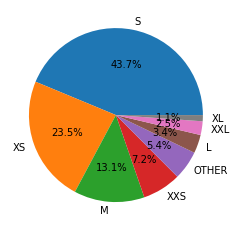

In [ ]:
label = df['product_variation_size_id'].value_counts().index.tolist()
plt.pie(df['product_variation_size_id'].value_counts(),labels  = label, autopct = '%1.1f%%');

In [ ]:
df.columns

Index(['title', 'title_orig', 'price', 'retail_price', 'currency_buyer',
       'units_sold', 'uses_ad_boosts', 'rating', 'rating_count',
       'rating_five_count', 'rating_four_count', 'rating_three_count',
       'rating_two_count', 'rating_one_count', 'badges_count',
       'badge_local_product', 'badge_product_quality', 'badge_fast_shipping',
       'tags', 'product_color', 'product_variation_size_id',
       'product_variation_inventory', 'shipping_option_name',
       'shipping_option_price', 'shipping_is_express', 'countries_shipped_to',
       'inventory_total', 'has_urgency_banner', 'urgency_text',
       'origin_country', 'merchant_title', 'merchant_name',
       'merchant_info_subtitle', 'merchant_rating_count', 'merchant_rating',
       'merchant_id', 'merchant_has_profile_picture',
       'merchant_profile_picture', 'product_url', 'product_picture',
       'product_id', 'theme', 'crawl_month', 'product_for_gender'],
      dtype='object')

- Which colour of clothes sales the most?

In [ ]:
color_sale=df.groupby('product_color')['units_sold'].sum()
color_sale=color_sale.reset_index().sort_values(by='units_sold',ascending=False)
color_sale

,product_color,units_sold
13,black,1582313
90,white,1122227
41,grey,436190
77,purple,338480
20,blue,316238
...,...,...
48,leopardprint,100
69,orange & camouflage,100
78,rainbow,50
66,offblack,50


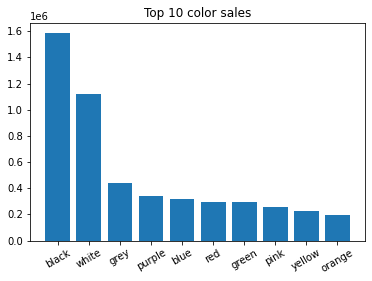

In [ ]:
plt.bar(
      x= color_sale[:10]['product_color'],
      height= color_sale[:10]['units_sold'])
plt.xticks(rotation= 30)
plt.title('Top 10 color sales');

- Which tags are used by merchants the most?

In [ ]:
df['tags'].value_counts()

Summer,Fashion,Necks,Skirts,Dress,Loose,Women's Fashion,Round neck,beach dress,sleeveless,Beach,Casual,Women                                                                                                                                               17
Summer,Sling,Dresses,Dress,V-neck,Casual,Pocket,Women's Fashion,Sleeveless dress,women dress,Floral,sleeveless,Women,loose dress,Pleated,casual dress                                                                                                       9
slimming,wasitcincher,Fashion,waistgirdle,slimmingcorset,Corset,Summer,Waist,waist trainer,Fashion Accessory,Vest,shaperwear,belt                                                                                                                           8
Summer,Women Rompers,Plus Size,women long pants,linenjumpsuit,pants,Overalls,Loose,plussizejumpsuit,Women's Fashion,strappant,Long pants,Jumpsuits & Rompers,rompers womens jumpsuit,Vintage,Women,women Jumpsuit,Casual,jumpsuit             

In [ ]:
from wordcloud import WordCloud

bag_of_words=[]

for x in df['tags']:
    for word in str(x).split(sep=','):
        word=word.lower()
        bag_of_words.append(word)

len(bag_of_words)

27355

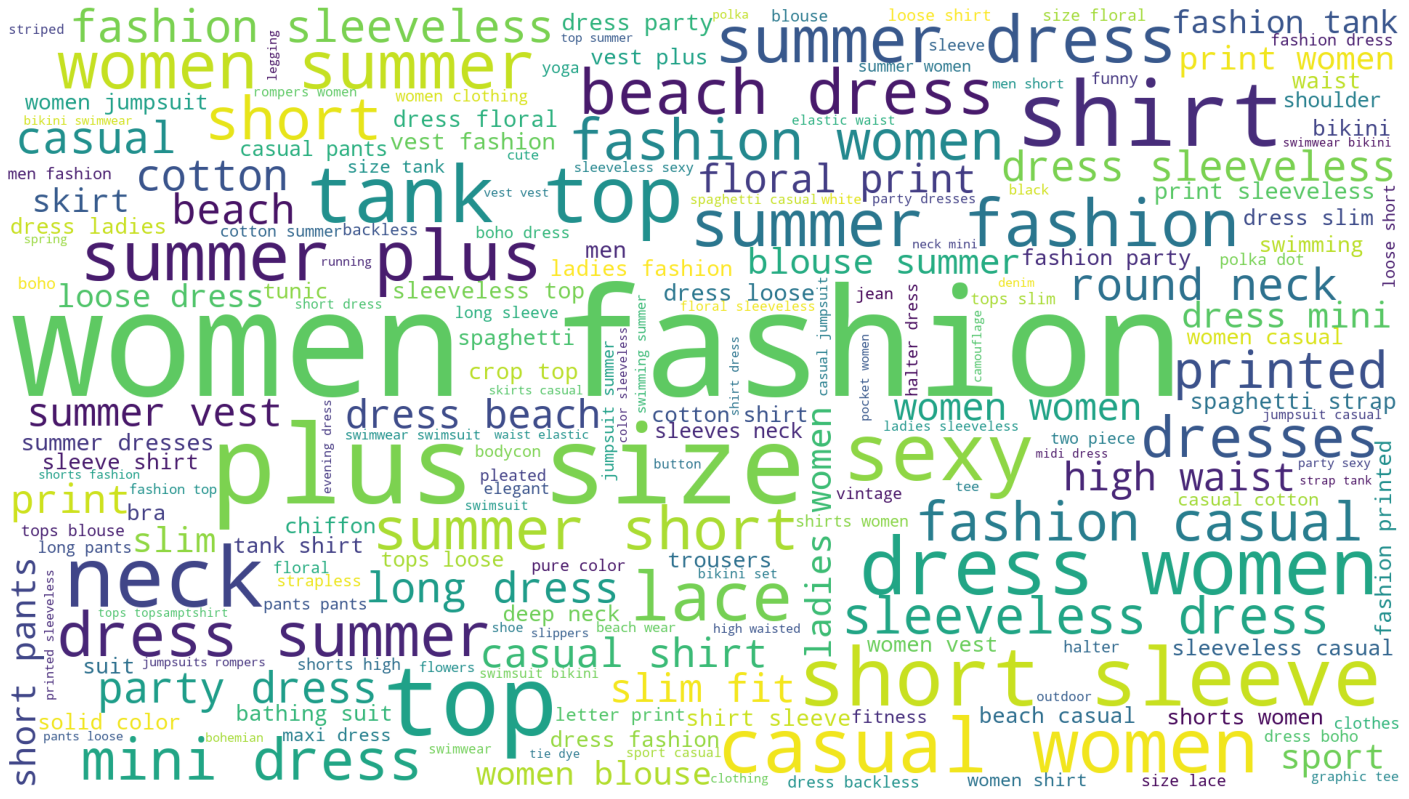

In [ ]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(background_color='white', width=1920, height=1080).generate(" ".join(bag_of_words))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

- Effect of Ratings on Units Sold vs Ad Boost

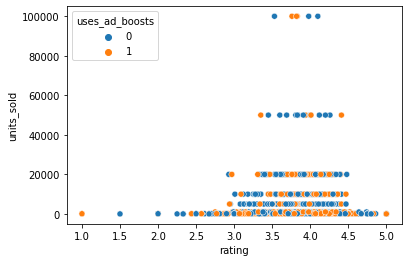

In [ ]:
sns.scatterplot(x =df['rating'], y= df['units_sold'], hue = df['uses_ad_boosts'])

### Null Value Handling

In [ ]:
# dropping some of unnecessary colummns
df.drop(['title','title_orig','currency_buyer','origin_country','merchant_title', 
         'merchant_name','merchant_info_subtitle', 'merchant_id',
         'merchant_profile_picture','product_url', 'product_picture','product_id',
        'theme','crawl_month'],axis = 1, inplace = True)

In [ ]:
df.isnull().sum()

price                              0
retail_price                       0
units_sold                         0
uses_ad_boosts                     0
rating                             0
rating_count                       0
rating_five_count                 45
rating_four_count                 45
rating_three_count                45
rating_two_count                  45
rating_one_count                  45
badges_count                       0
badge_local_product                0
badge_product_quality              0
badge_fast_shipping                0
tags                               0
product_color                     41
product_variation_size_id          0
product_variation_inventory        0
shipping_option_name               0
shipping_option_price              0
shipping_is_express                0
countries_shipped_to               0
inventory_total                    0
has_urgency_banner              1100
urgency_text                    1100
merchant_rating_count              0
m

In [ ]:
#Checking the percentage of nulls in the columns
for col in df.columns:
    if df[col].isnull().sum() != 0:
        print(f'Column {col} has {round((df[col].isnull().sum()/df.shape[0])*100,2)}% Null values.')

Column rating_five_count has 2.86% Null values.
Column rating_four_count has 2.86% Null values.
Column rating_three_count has 2.86% Null values.
Column rating_two_count has 2.86% Null values.
Column rating_one_count has 2.86% Null values.
Column product_color has 2.61% Null values.
Column has_urgency_banner has 69.93% Null values.
Column urgency_text has 69.93% Null values.


In [ ]:
# We drop the columns
df.drop(['has_urgency_banner','urgency_text'],axis = 1,inplace =True)
df.shape

(1573, 28)

In [ ]:
df.dropna(inplace = True)
df.shape

(1490, 28)

In [ ]:
print(df.isnull().sum())
if (df.isnull().sum()).sum() == 0:
    print("\nNo Missing Values")

price                           0
retail_price                    0
units_sold                      0
uses_ad_boosts                  0
rating                          0
rating_count                    0
rating_five_count               0
rating_four_count               0
rating_three_count              0
rating_two_count                0
rating_one_count                0
badges_count                    0
badge_local_product             0
badge_product_quality           0
badge_fast_shipping             0
tags                            0
product_color                   0
product_variation_size_id       0
product_variation_inventory     0
shipping_option_name            0
shipping_option_price           0
shipping_is_express             0
countries_shipped_to            0
inventory_total                 0
merchant_rating_count           0
merchant_rating                 0
merchant_has_profile_picture    0
product_for_gender              0
dtype: int64

No Missing Values


In [ ]:
# nan_replace={'has_urgency_banner':0,'urgency_text':'N/A','origin_country':'unknown','product_color':'unknown'}
# df.fillna(nan_replace,inplace=True)
# df.isnull().sum()

In [ ]:
df.dropna(inplace = True)

In [ ]:
df.shape

(1490, 28)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1490 entries, 0 to 1572
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         1490 non-null   float64
 1   retail_price                  1490 non-null   int64  
 2   units_sold                    1490 non-null   int64  
 3   uses_ad_boosts                1490 non-null   int64  
 4   rating                        1490 non-null   float64
 5   rating_count                  1490 non-null   int64  
 6   rating_five_count             1490 non-null   float64
 7   rating_four_count             1490 non-null   float64
 8   rating_three_count            1490 non-null   float64
 9   rating_two_count              1490 non-null   float64
 10  rating_one_count              1490 non-null   float64
 11  badges_count                  1490 non-null   int64  
 12  badge_local_product           1490 non-null   int64  
 13  bad

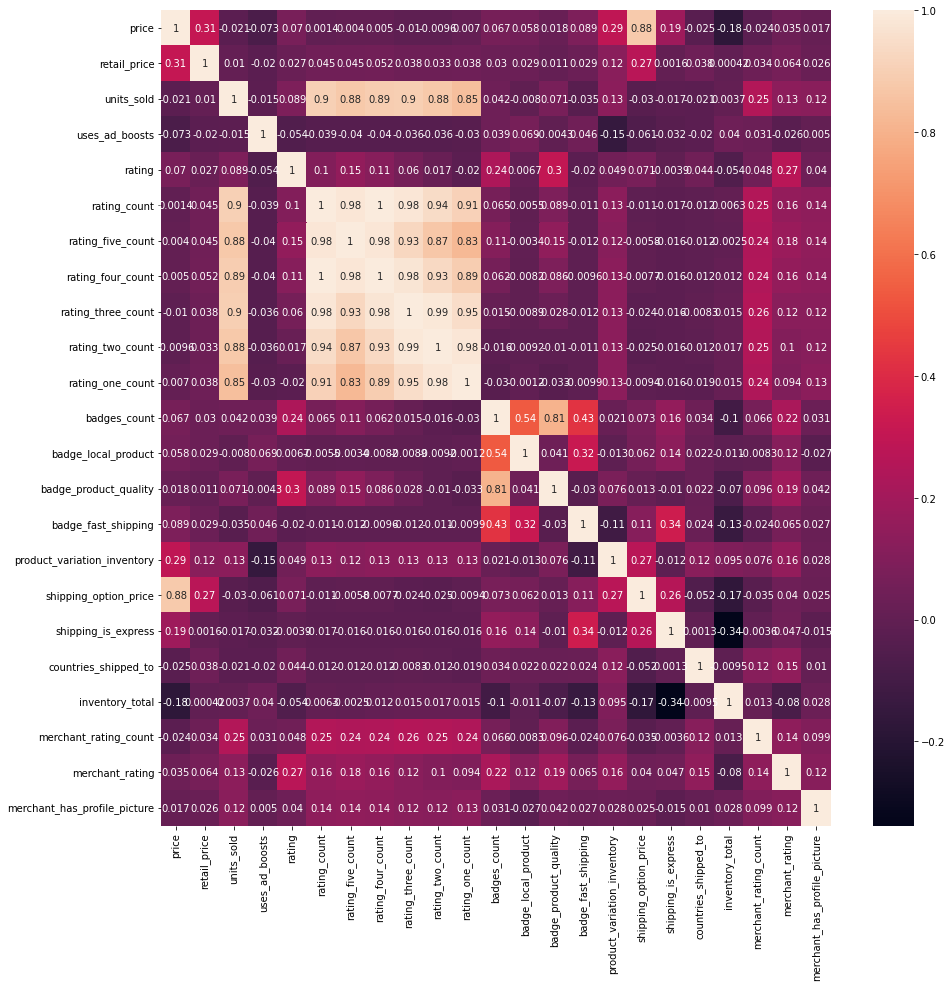

In [ ]:
# Plot the correlation matrix
plt.figure(figsize = (15,15))
sns.heatmap(df.corr(), annot = True);

In [ ]:
df.drop( ['rating_five_count','rating_four_count','rating_three_count','rating_two_count','rating_one_count','product_for_gender','tags'],axis =1 , inplace = True)

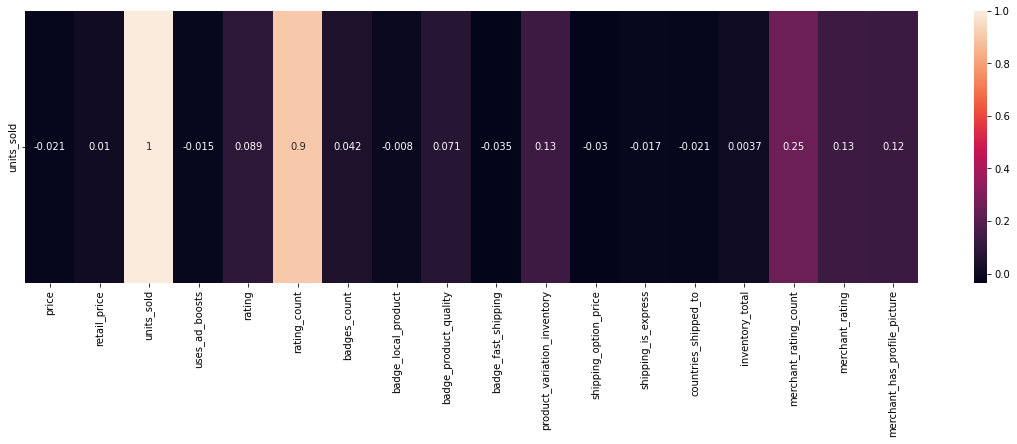

In [ ]:
plt.figure(figsize=(20,5))
sns.heatmap(df.corr().loc[['units_sold'],:], annot = df.corr().loc[['units_sold'],:])

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() # here we create a object of a function

In [ ]:
df[df.select_dtypes(include =['object']).columns] = df[df.select_dtypes(include =['object']).columns].apply(le.fit_transform)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1490 entries, 0 to 1572
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         1490 non-null   float64
 1   retail_price                  1490 non-null   int64  
 2   units_sold                    1490 non-null   int64  
 3   uses_ad_boosts                1490 non-null   int64  
 4   rating                        1490 non-null   float64
 5   rating_count                  1490 non-null   int64  
 6   badges_count                  1490 non-null   int64  
 7   badge_local_product           1490 non-null   int64  
 8   badge_product_quality         1490 non-null   int64  
 9   badge_fast_shipping           1490 non-null   int64  
 10  product_color                 1490 non-null   int64  
 11  product_variation_size_id     1490 non-null   int64  
 12  product_variation_inventory   1490 non-null   int64  
 13  shi

In [ ]:
# sns.pairplot(df) # HEre we use seaborn to plot pair plot for a correlogram
# plt.show()

In [ ]:
df['units_sold'].value_counts()

100       487
1000      394
5000      214
10000     175
20000      98
50         71
10         29
50000      15
100000      5
2           1
7           1
Name: units_sold, dtype: int64

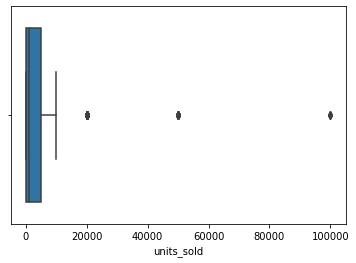

In [ ]:
sns.boxplot(df['units_sold'])

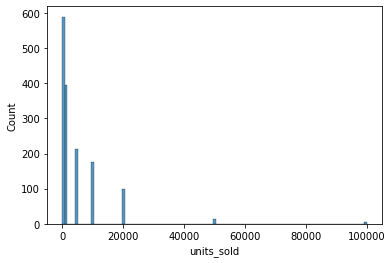

In [ ]:
sns.histplot(df['units_sold'])

In [ ]:
df.shape

(1490, 21)

In [ ]:
df = df[(df['units_sold'] != 2) & (df['units_sold'] != 7) & (df['units_sold'] != 100000)] # got rid of columns with values 2,7 as they are only single cases of each.
df.shape

(1483, 21)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
vif=pd.DataFrame()
vif["vif values"] = [variance_inflation_factor(df.values, i ) for i in range(df.shape[1])]
vif['variables'] = df.columns

In [ ]:
vif

,vif values,variables
0,25.756277,price
1,1.769347,retail_price
2,6.668100,units_sold
3,1.848558,uses_ad_boosts
4,73.954968,rating
5,6.217938,rating_count
6,1.154585,badge_local_product
7,1.228042,badge_product_quality
8,1.294235,badge_fast_shipping
9,3.919756,product_color


This shows a perfect correlation between two independent variables. In the case of perfect correlation, we get R2 =1, which lead to 1/(1-R2) infinity. To solve this problem we need to drop one of the variables from the dataset which is causing this perfect multicollinearity.
As I first checked and got inf VIF for columns based on badges.

- We simply droped the badges_count column.


In [ ]:

# We drop the columns which have high Variance Inflation Fator,
# VIF measure signifies that the one or more columns can be droped.
df_og = df.copy() # we create a copy of dataframe with all the columns.
df.drop(['badges_count'],axis=1,inplace=True)

KeyError: ignored

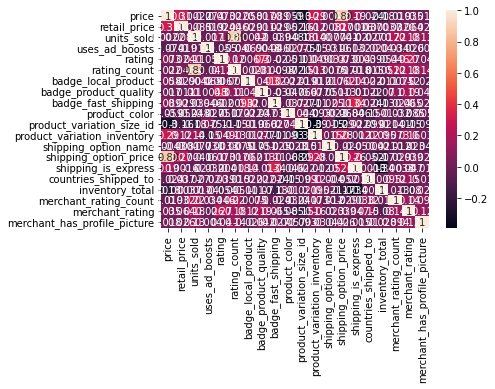

In [ ]:
sns.heatmap(df.corr(), annot = True)

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size = 0.2, random_state = 42)

In [ ]:
# train
x_train  = train.drop(['units_sold'], axis = 1)
y_train = train['units_sold']

# test
x_test = test.drop(['units_sold'],axis = 1)
y_test = test['units_sold']

In [ ]:
# checking value count before class imbalance,
df['units_sold'].value_counts()

100      487
1000     394
5000     214
10000    175
20000     98
50        71
10        29
50000     15
Name: units_sold, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [ ]:
x_train_sm , y_train_sm = smote.fit_resample(x_train, y_train)

In [ ]:
# checking value count after class imbalance,
y_train_sm.value_counts()

10000    391
5000     391
100      391
1000     391
20000    391
50       391
10       391
50000    391
Name: units_sold, dtype: int64

In [ ]:
x_train = x_train_sm
y_train = y_train_sm

In [ ]:
print("Training Data,",
    x_train.shape,
    y_train.shape,
    "\nTesting Data",
     x_test.shape,
     y_test.shape)

Training Data, (3128, 19) (3128,) 
Testing Data (297, 19) (297,)


### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
Acc_DT_train = dt.score(x_train,y_train)
print(f"Accuracy of Model on Train Data using DecisionTreeClassifier: {Acc_DT_train*100}%")

Accuracy of Model on Train Data using DecisionTreeClassifier: 100.0%


              precision    recall  f1-score   support

          10       0.33      0.29      0.31         7
          50       0.52      0.75      0.62        16
         100       0.87      0.79      0.83        96
        1000       0.81      0.72      0.76        85
        5000       0.46      0.55      0.50        38
       10000       0.51      0.50      0.51        40
       20000       0.47      0.64      0.55        14
       50000       0.50      1.00      0.67         1

    accuracy                           0.68       297
   macro avg       0.56      0.66      0.59       297
weighted avg       0.70      0.68      0.69       297



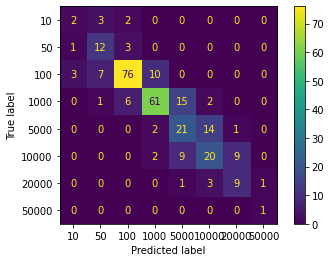

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from sklearn.metrics import ConfusionMatrixDisplay


pred_dt= dt.predict(x_test)

ConfusionMatrixDisplay.from_estimator( dt, x_test, y_test);

print(classification_report(y_test, pred_dt))

In [ ]:
Acc_DT_test = dt.score(x_test,y_test)
print(f"Accuracy of Model on Test Data using DecisionTreeClassifier: {Acc_DT_test*100}%")

Accuracy of Model on Test Data using DecisionTreeClassifier: 68.01346801346801%


In [ ]:
from prettytable import PrettyTable
model_comparision = PrettyTable()
model_comparision.field_names = ["Model Name", "Accuracy % of Train Data", "Accuracy % on Test Data"]

In [ ]:
model_comparision.add_row(["Decision Tree Classifier", Acc_DT_train*100, Acc_DT_test*100])

### Random Forrest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
Acc_rf_train = rf.score(x_train,y_train)
print(f"Accuracy of Model on Train Data using Random Forest classifier: {Acc_rf_train*100}%")

Accuracy of Model on Train Data using Random Forest classifier: 100.0%


              precision    recall  f1-score   support

          10       0.57      0.57      0.57         7
          50       0.73      0.69      0.71        16
         100       0.88      0.88      0.88        96
        1000       0.83      0.80      0.81        85
        5000       0.61      0.74      0.67        38
       10000       0.69      0.60      0.64        40
       20000       0.57      0.57      0.57        14
       50000       0.33      1.00      0.50         1

    accuracy                           0.77       297
   macro avg       0.65      0.73      0.67       297
weighted avg       0.77      0.77      0.77       297



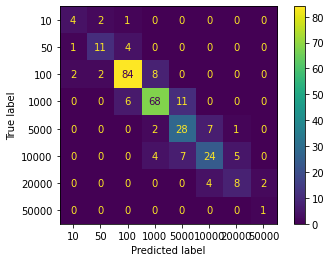

In [ ]:

pred_rf = rf.predict(x_test)

ConfusionMatrixDisplay.from_estimator( rf, x_test, y_test);
print(classification_report(y_test, pred_rf))

In [ ]:
Acc_rf_test = rf.score(x_test,y_test)
print(f"Accuracy of Model using Random Forest classifier: {Acc_rf_test*100}%")

Accuracy of Model using Random Forest classifier: 76.76767676767676%


In [ ]:
model_comparision.add_row(["Random Forrest Classifier", Acc_rf_train*100, Acc_rf_test*100])

### AdaBoost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
rf = RandomForestClassifier()
adab_rf = AdaBoostClassifier(rf, n_estimators=20)

In [ ]:
adab_rf.fit(x_train, y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier(), n_estimators=20)

In [ ]:
Acc_rf_adab_train = adab_rf.score(x_train,y_train)
print(f"Accuracy of Model on Train Data using Random Forest classifier with Adaboost: {Acc_rf_adab_train*100}%")

Accuracy of Model on Train Data using Random Forest classifier with Adaboost: 100.0%


              precision    recall  f1-score   support

          10       0.80      0.57      0.67         7
          50       0.71      0.75      0.73        16
         100       0.89      0.89      0.89        96
        1000       0.84      0.78      0.80        85
        5000       0.53      0.68      0.60        38
       10000       0.64      0.57      0.61        40
       20000       0.54      0.50      0.52        14
       50000       0.33      1.00      0.50         1

    accuracy                           0.75       297
   macro avg       0.66      0.72      0.66       297
weighted avg       0.77      0.75      0.76       297



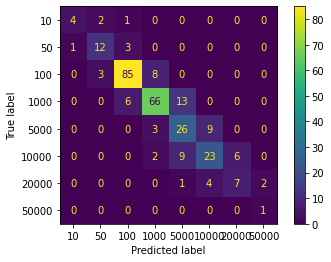

In [ ]:
pred_adab_rf = adab_rf.predict(x_test)

ConfusionMatrixDisplay.from_estimator( adab_rf, x_test, y_test);
print(classification_report(y_test, pred_adab_rf))

In [ ]:
Acc_rf_adab_test = adab_rf.score(x_test,y_test)
print(f"Accuracy of Model on Test Data using Random Forest classifier with Adaboost: {Acc_rf_adab_test*100}%")

Accuracy of Model on Test Data using Random Forest classifier with Adaboost: 75.42087542087542%


In [ ]:
model_comparision.add_row(["AdaBoostClassifier", Acc_rf_adab_train*100, Acc_rf_adab_test*100])

- We check for model comparision

In [ ]:
print(model_comparision)

+---------------------------+--------------------------+-------------------------+
|         Model Name        | Accuracy % of Train Data | Accuracy % on Test Data |
+---------------------------+--------------------------+-------------------------+
|  Decision Tree Classifier |          100.0           |    68.01346801346801    |
| Random Forrest Classifier |          100.0           |    76.76767676767676    |
|     AdaBoostClassifier    |          100.0           |    75.42087542087542    |
+---------------------------+--------------------------+-------------------------+


- We'll try to use Random Forrest Classifier with GridSearchCV

In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV

reg = RandomForestClassifier(random_state=42)

param_grid = { 
    'n_estimators': np.arange(4, 50, 2),
    'max_depth' : [3,4,5,6,7,8],
}

In [ ]:
CV_reg = GridSearchCV(estimator=reg, param_grid=param_grid, cv= 5)
CV_reg.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8],
                         'n_estimators': array([ 4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36,
       38, 40, 42, 44, 46, 48])})

In [ ]:
CV_reg.best_params_

{'max_depth': 8, 'n_estimators': 24}

In [ ]:
classifier = RandomForestClassifier(n_estimators=48, random_state=42, max_depth=8)
classifier.fit(x_train, y_train)

RandomForestClassifier(max_depth=8, n_estimators=48, random_state=42)

In [ ]:
cf_rf_best_param_acc_train = classifier.score(x_train,y_train)
print(f"Accuracy of Model using Random Forest classifier Final Model: {cf_rf_best_param_acc_train*100}%")

Accuracy of Model using Random Forest classifier Final Model: 94.34143222506394%


              precision    recall  f1-score   support

          10       0.50      0.57      0.53         7
          50       0.71      0.75      0.73        16
         100       0.90      0.86      0.88        96
        1000       0.82      0.80      0.81        85
        5000       0.58      0.68      0.63        38
       10000       0.65      0.60      0.62        40
       20000       0.50      0.43      0.46        14
       50000       0.33      1.00      0.50         1

    accuracy                           0.75       297
   macro avg       0.62      0.71      0.65       297
weighted avg       0.76      0.75      0.76       297



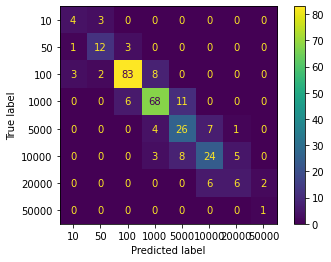

In [ ]:
pred_rf_best_para = classifier.predict(x_test)

ConfusionMatrixDisplay.from_estimator( classifier, x_test, y_test);
print(classification_report(y_test, pred_rf_best_para))

In [ ]:
cf_rf_best_param_acc_test = classifier.score(x_test,y_test)
print(f"Accuracy of Model using Random Forest classifier Final Model: {cf_rf_best_param_acc_test*100}%")

Accuracy of Model using Random Forest classifier Final Model: 75.42087542087542%


## We have created a model to predict the number of units that will be sold, for our client. So they can be prepared for the season with these approximate number of units. So that seller does'nt overstock or understock the products. 
- Also as we have checked the size distribution of the products to be kept in the inventory
- Also the colours which are in demand, as they are sold the most can be considered for the season.
- Womens clothing is mostly bought and hence that should be category our seller can list products for.


Further analysis:
- we can check the products which are selling the most and have very less number of seller listing those products.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [ ]:
vif=pd.DataFrame()
vif["vif values"] = [variance_inflation_factor(df.values, i ) for i in range(df.shape[1])]
vif['variables'] = df.columns

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [ ]:
vif

,vif values,variables
0,25.756277,price
1,1.769347,retail_price
2,6.668100,units_sold
3,1.848558,uses_ad_boosts
4,73.954968,rating
5,6.217938,rating_count
6,inf,badges_count
7,inf,badge_local_product
8,inf,badge_product_quality
9,inf,badge_fast_shipping


## Perform dimensionality reduction using PCA such that the 95% of the variance is explained

In [ ]:
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
cc_sc = scaler.fit(x_train)

In [ ]:
scaled_cc = scaler.transform(x_train)

In [ ]:
pca = PCA()

In [ ]:
pca.fit(scaled_cc)

PCA()

In [ ]:
x_pca1 = pca.transform(scaled_cc)

In [ ]:
df.shape

(1483, 20)

In [ ]:
x_pca1.shape

(3128, 19)

In [ ]:
list(pca.explained_variance_ratio_)

[0.12899563116246038,
 0.10768968467506522,
 0.08051213301560792,
 0.06618854113175836,
 0.06223790728197629,
 0.05749754743304131,
 0.054501107626978185,
 0.053141427856898966,
 0.05193678737418176,
 0.05070721497407447,
 0.0433962737798674,
 0.0426975691964409,
 0.04085957299693439,
 0.037920971559982496,
 0.03354999646580369,
 0.02982399323192271,
 0.026359778691772535,
 0.02437319409169276,
 0.007610667453540435]

In [ ]:
len(pca.explained_variance_ratio_)

19

In [ ]:
pca_variance_ratio_list = list(pca.explained_variance_ratio_)
np.sum(pca_variance_ratio_list[0:16])

0.9416563597629946

As we can check around 96% of the variance explained by 12 Feautures.

## Find the optimum value of k for k-means clustering using the elbow method. Plot the elbow curve